# Iowa Prisoners Notebook for Office HOurs

- online-ds-ft-070620
- 09/30/20 - 10/04/20

# Activity: Iowa Prisoners (with Pipelines!)

In [1]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.2.25 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
# # prisoners = "https://raw.githubusercontent.com/jirvingphd/dsc-3-final-project-online-ds-ft-021119/master/iowa_recidivism_renamed.csv"
df = fs.datasets.load_iowa_prisoners(vers='clean',read_csv_kwds={'index_col':0})
## Drop unwanted cols
df= df.drop(columns=['yr_released','report_year'])
df.head()

,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


In [3]:
df.dtypes

race_ethnicity    object
age_released      object
crime_class       object
crime_type        object
crime_subtype     object
release_type      object
super_dist        object
recidivist        object
target_pop        object
sex               object
dtype: object

In [4]:
df.nunique().sum()

90

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26020 entries, 0 to 26019
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   race_ethnicity  25990 non-null  object
 1   age_released    26017 non-null  object
 2   crime_class     26020 non-null  object
 3   crime_type      26020 non-null  object
 4   crime_subtype   26020 non-null  object
 5   release_type    24258 non-null  object
 6   super_dist      16439 non-null  object
 7   recidivist      26020 non-null  object
 8   target_pop      26020 non-null  object
 9   sex             26017 non-null  object
dtypes: object(10)
memory usage: 2.2+ MB


### Making age_released numerical

In [6]:
df['age_released'].value_counts(dropna=False)

25-34           9554
35-44           6223
Under 25        4590
45-54           4347
55 and Older    1303
NaN                3
Name: age_released, dtype: int64

In [7]:
# Mapping age_map onto 'age_released'
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_numbers = (20,30,40,50,70) 
age_num_map = dict(zip(age_ranges,age_numbers))
age_num_map

{'Under 25': 20, '25-34': 30, '35-44': 40, '45-54': 50, '55 and Older': 70}

In [8]:
df['age_released'] = df['age_released'].map(age_num_map)
df['age_released'].value_counts(dropna=False)

30.0    9554
40.0    6223
20.0    4590
50.0    4347
70.0    1303
NaN        3
Name: age_released, dtype: int64

### Simplifying Categorical Columns

In [9]:
# df['race_ethnicity'].value_counts(dropna=False)

In [10]:
# # Defining Dictionary Map for race_ethnicity categories
# race_ethnicity_map = {
#     'White - Non-Hispanic':'White',
#     'Black - Non-Hispanic': 'Black',
#     'White - Hispanic' : 'Hispanic',
#     'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
#     'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
#     'Black - Hispanic' : 'Black',
#     'American Indian or Alaska Native - Hispanic':'American Native',
#     'White -' : 'White',
#     'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
#     'N/A -' : np.nan,
#     'Black -':'Black'
# }

# df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)
# df['race_ethnicity'].value_counts(dropna=False)

In [11]:
# df['crime_class'].value_counts()

In [12]:
# # Remapping
# crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
#                   'Other Misdemeanor':np.nan,
#                    'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
#                    'Special Sentence 2005': 'Sex Offender',
#                    'Other Felony' : np.nan ,
#                    'Sexual Predator Community Supervision' : 'Sex Offender',
#                    'D Felony': 'D Felony',
#                    'C Felony' :'C Felony',
#                    'B Felony' : 'B Felony',
#                    'A Felony' : 'A Felony',
#                    'Aggravated Misdemeanor':'Aggravated Misdemeanor',
#                    'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
#                    'Felony - Enhanced':'Felony - Enhanced' ,
#                    'Serious Misdemeanor':'Serious Misdemeanor',
#                    'Simple Misdemeanor':'Simple Misdemeanor'}

# df['crime_class'] = df['crime_class'].map(crime_class_map)
# df['crime_class'].value_counts(dropna=False)

In [13]:
df.dtypes

race_ethnicity     object
age_released      float64
crime_class        object
crime_type         object
crime_subtype      object
release_type       object
super_dist         object
recidivist         object
target_pop         object
sex                object
dtype: object

> For interest of model gridsarching, let's drop some categorical features

In [14]:
df.nunique()

race_ethnicity    11
age_released       5
crime_class       15
crime_type         5
crime_subtype     26
release_type      12
super_dist        10
recidivist         2
target_pop         2
sex                2
dtype: int64

In [15]:
df.drop(columns=['crime_subtype'],inplace=True)
df.nunique()

race_ethnicity    11
age_released       5
crime_class       15
crime_type         5
release_type      12
super_dist        10
recidivist         2
target_pop         2
sex                2
dtype: int64

## Preprocessing with Pipelines +  `ColumnTransformer`

- [Pipeline Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)
- [ColumnTransformer Documentation](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

### Train-Test-Split

In [16]:
## Make x and y
X = df.drop(columns=['recidivist'])
y = df['recidivist'].map({'Yes':1,'No':0})
y

0        1
1        1
2        1
3        0
4        1
        ..
26015    0
26016    0
26017    0
26018    0
26019    1
Name: recidivist, Length: 26020, dtype: int64

In [17]:
## check class balance
y.value_counts(normalize=True)

0    0.666372
1    0.333628
Name: recidivist, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

## Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y)#,stratify=y)
y_train.value_counts(1), y_test.value_counts(1)

(0    0.663336
 1    0.336664
 Name: recidivist, dtype: float64,
 0    0.67548
 1    0.32452
 Name: recidivist, dtype: float64)

# Preprocessing Data

- Impute Null values
- Scaling Numerical Data
- Encode Categorical Data
    - ~~Label Encoding~~
    - One hot encoding


In [19]:
df.isna().sum()

race_ethnicity      30
age_released         3
crime_class          0
crime_type           0
release_type      1762
super_dist        9581
recidivist           0
target_pop           0
sex                  3
dtype: int64

<AxesSubplot:>

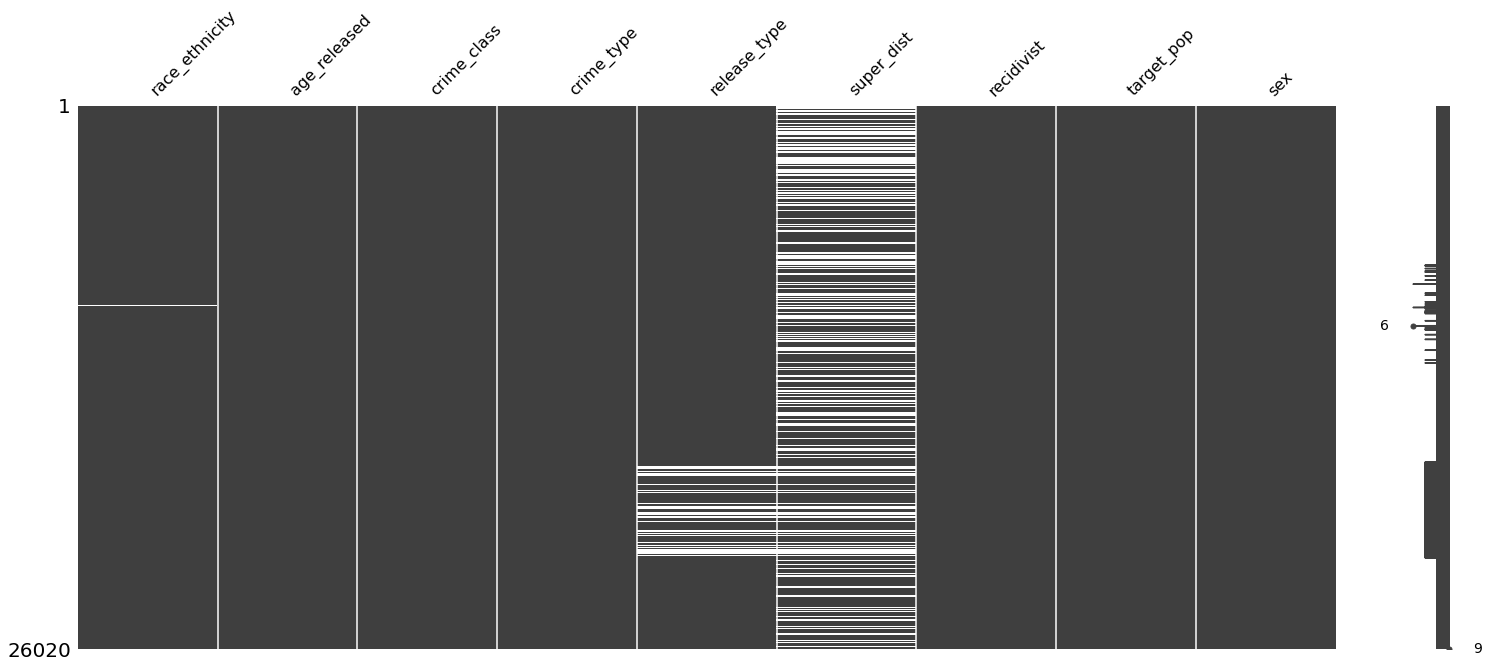

In [20]:
## Check null values (visually too)
import missingno
missingno.matrix(df)

In [21]:
X_train.columns

Index(['race_ethnicity', 'age_released', 'crime_class', 'crime_type',
       'release_type', 'super_dist', 'target_pop', 'sex'],
      dtype='object')


- 'race_ethnicity'
- 'age_released',
- 'crime_class',
- 'crime_type',
- 'release_type',
- 'super_dist', 
- 'target_pop'
- , 'sex'

#### Pipelnes and ColumnTransformer

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

In [24]:
from sklearn import set_config
set_config(display='text')

In [25]:
## Get a list of columns to be run as numeric data
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age_released'], dtype='object')

In [26]:
steps = []
nan_vals = ['?',np.nan]

for i,val in enumerate(nan_vals):
    
    steps.append( (f"imputer_{i}", SimpleImputer(missing_values=val)))
steps

[('imputer_0', SimpleImputer(missing_values='?')),
 ('imputer_1', SimpleImputer())]

In [27]:
num_transformer = Pipeline(steps=[*steps,('scaler',StandardScaler())])
num_transformer

Pipeline(steps=[('imputer_0', SimpleImputer(missing_values='?')),
                ('imputer_1', SimpleImputer()), ('scaler', StandardScaler())])

In [28]:
## Make a num_transformer pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [29]:
## vis as diagram
set_config(display='text')
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [30]:
## Get a list of columns to be run as categorical data
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['race_ethnicity', 'crime_class', 'crime_type', 'release_type',
       'super_dist', 'target_pop', 'sex'],
      dtype='object')

In [31]:
## Create a cat_transformer pipeline 
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))])
cat_transformer

## that will impute using median and then calculate z-scores


Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Combine Preprocessing into one ColumnTransformer

In [32]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age_released'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['race_ethnicity', 'crime_class', 'crime_type', 'release_type',
       'super_dist', 'target_pop', 'sex'],
      

In [33]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_test_tf = preprocessing.transform(X_test)
X_train_tf

array([[-1.29574378,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32398782,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32398782,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.29574378,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.13385362,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.32398782,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

> **One downside of Pipelines is that its harder to get the individual info we need to re-form our dataset as a df**

In [34]:
set_config(display='text')
slice_pipe = preprocessing.named_transformers_['cat']
slice_pipe

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [35]:
cat_feautres = slice_pipe.named_steps['encoder'].get_feature_names(cat_cols)
cat_feautres

array(['race_ethnicity_American Indian or Alaska Native - Hispanic',
       'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
       'race_ethnicity_Black -', 'race_ethnicity_Black - Hispanic',
       'race_ethnicity_Black - Non-Hispanic', 'race_ethnicity_N/A -',
       'race_ethnicity_White -', 'race_ethnicity_White - Hispanic',
       'race_ethnicity_White - Non-Hispanic', 'race_ethnicity_missing',
       'crime_class_A Felony', 'crime_class_Aggravated Misdemeanor',
       'crime_class_B Felony', 'crime_class_C Felony',
       'crime_class_D Felony', 'crime_class_Felony - Enhanced',
       'crime_class_Felony - Enhancement to Original Penalty',
       'crime_class_Felony - Mandatory Minimum',
       'crime_class_Other Felony', 'crime_class_Other Felony (Old Code)',
       'crime_class_Other Misdemeanor', 'crime_class_Serious Misdemeanor',
   

In [36]:
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_feautres])
X_train_tf

,age_released,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,race_ethnicity_Black - Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_N/A -,race_ethnicity_White -,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,-1.295744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.323988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.323988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.485878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.133854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19510,1.133854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
19511,-0.485878,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
19512,-1.295744,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
19513,1.133854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [37]:
number_cols = num_cols.tolist().copy()
number_cols

['age_released']

In [38]:
number_cols.extend(cat_feautres)

In [39]:
number_cols

['age_released',
 'race_ethnicity_American Indian or Alaska Native - Hispanic',
 'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
 'race_ethnicity_Asian or Pacific Islander - Hispanic',
 'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
 'race_ethnicity_Black -',
 'race_ethnicity_Black - Hispanic',
 'race_ethnicity_Black - Non-Hispanic',
 'race_ethnicity_N/A -',
 'race_ethnicity_White -',
 'race_ethnicity_White - Hispanic',
 'race_ethnicity_White - Non-Hispanic',
 'race_ethnicity_missing',
 'crime_class_A Felony',
 'crime_class_Aggravated Misdemeanor',
 'crime_class_B Felony',
 'crime_class_C Felony',
 'crime_class_D Felony',
 'crime_class_Felony - Enhanced',
 'crime_class_Felony - Enhancement to Original Penalty',
 'crime_class_Felony - Mandatory Minimum',
 'crime_class_Other Felony',
 'crime_class_Other Felony (Old Code)',
 'crime_class_Other Misdemeanor',
 'crime_class_Serious Misdemeanor',
 'crime_class_Sexual Predator Community Supervision',
 'crime_class

In [40]:
# [*num_cols,*cat_feautres]

In [41]:
X_test_tf = pd.DataFrame(X_test_tf,columns=[*num_cols, *cat_feautres])
X_test_tf


,age_released,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black -,race_ethnicity_Black - Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_N/A -,race_ethnicity_White -,...,super_dist_7JD,super_dist_8JD,super_dist_ISC,super_dist_Interstate Compact,super_dist_missing,target_pop_No,target_pop_Yes,sex_Female,sex_Male,sex_missing
0,-0.485878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.323988,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.485878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,-0.485878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,-0.485878,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,-0.485878,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6501,-1.295744,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6502,-1.295744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
6503,0.323988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


## RandomForest


In [42]:
set_config(display='text')
from sklearn.ensemble import RandomForestClassifier

In [43]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=None,
                           normalize='true',cmap='Purples',label=''):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f" {label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    return report #fig,axes

------------------------------------------------------------
[i] CLASSIFICATION REPORT Baseline - Imblananced
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.71      0.82      0.76      4394
         Yes       0.45      0.31      0.37      2111

    accuracy                           0.65      6505
   macro avg       0.58      0.56      0.56      6505
weighted avg       0.63      0.65      0.63      6505

------------------------------------------------------------




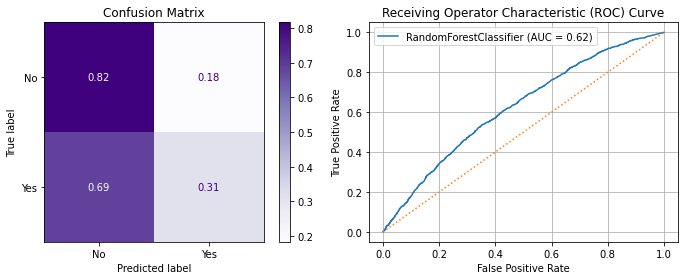

In [44]:
## fit model
clf = RandomForestClassifier()
clf.fit(X_train_tf,y_train)

evaluate_classification(clf,X_test_tf,y_test,classes=['No','Yes'],
                       label='Baseline - Imblananced');

------------------------------------------------------------
[i] CLASSIFICATION REPORT class_weight='balanced'
------------------------------------------------------------
              precision    recall  f1-score   support

          No       0.74      0.68      0.70      4394
         Yes       0.42      0.50      0.46      2111

    accuracy                           0.62      6505
   macro avg       0.58      0.59      0.58      6505
weighted avg       0.64      0.62      0.62      6505

------------------------------------------------------------




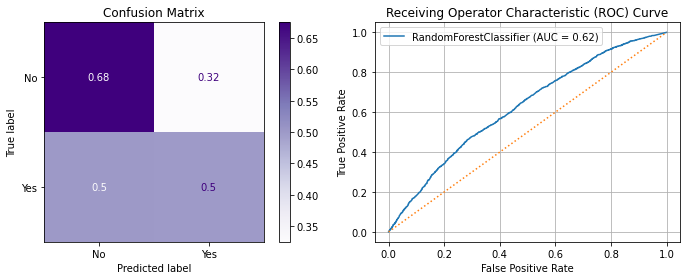

In [45]:
## Class_weight
## fit model
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_tf,y_train)
evaluate_classification(clf,X_test_tf,y_test,classes=['No','Yes'],
                       label="class_weight='balanced'");

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.50      0.61      4394
           1       0.40      0.71      0.52      2111

    accuracy                           0.57      6505
   macro avg       0.59      0.60      0.56      6505
weighted avg       0.66      0.57      0.58      6505

------------------------------------------------------------




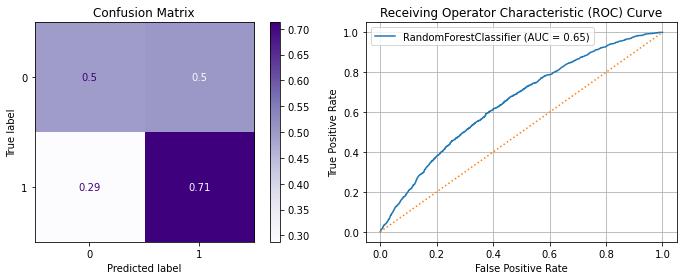

{'0': {'precision': 0.7818900467121811,
  'recall': 0.49522075557578515,
  'f1-score': 0.6063814964469835,
  'support': 4394},
 '1': {'precision': 0.40408382590005376,
  'recall': 0.7124585504500237,
  'f1-score': 0.5156866106634664,
  'support': 2111},
 'accuracy': 0.5657186779400462,
 'macro avg': {'precision': 0.5929869363061174,
  'recall': 0.6038396530129044,
  'f1-score': 0.561034053555225,
  'support': 6505},
 'weighted avg': {'precision': 0.6592845229405592,
  'recall': 0.5657186779400462,
  'f1-score': 0.5769492283625862,
  'support': 6505}}

In [46]:
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

params ={'max_depth':[None,5,7,10,12],
         'criterion':['gini','entropy'],
         'class_weight':[None,"balanced"]# "balanced_subsample"]
        }
grid = GridSearchCV(clf,params,scoring='recall',n_jobs=-1)

grid.fit(X_train_tf,y_train)
grid.best_params_

evaluate_classification(grid.best_estimator_,X_test_tf,y_test)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7}
------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.52      0.63      4394
           1       0.41      0.69      0.52      2111

    accuracy                           0.58      6505
   macro avg       0.60      0.61      0.57      6505
weighted avg       0.66      0.58      0.59      6505

------------------------------------------------------------




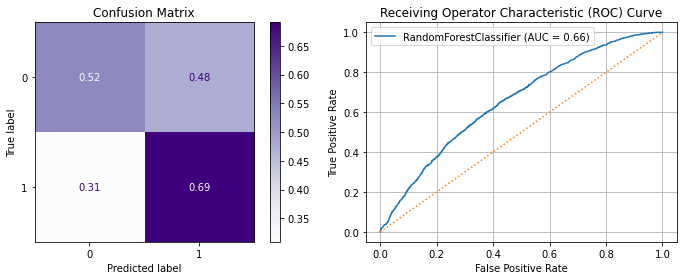

In [48]:
clf = RandomForestClassifier()
params ={'max_depth':[None,5,7],
         'criterion':['gini','entropy'],
         'class_weight':[None,"balanced"]# "balanced_subsample"]
        }
grid = GridSearchCV(clf,params,scoring='roc_auc',n_jobs=-1)

grid.fit(X_train_tf,y_train)
print(grid.best_params_)

evaluate_classification(grid.best_estimator_,X_test_tf,y_test)
best_clf =grid.best_estimator_

<AxesSubplot:>

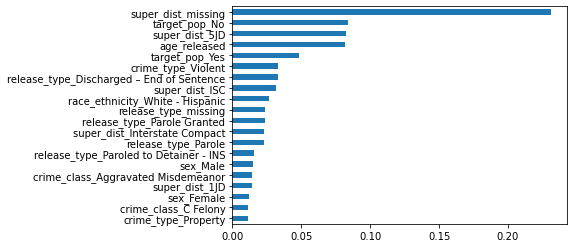

In [51]:
# clf = grid.best_estimator_
importance = pd.Series(best_clf.feature_importances_,index=X_train_tf.columns)
importance.sort_values().tail(20).plot(kind='barh')

### RandomizedSearchCV

{'max_depth': 10, 'criterion': 'gini', 'class_weight': 'balanced'}
------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.56      0.65      4394
           1       0.42      0.66      0.51      2111

    accuracy                           0.59      6505
   macro avg       0.60      0.61      0.58      6505
weighted avg       0.66      0.59      0.61      6505

------------------------------------------------------------




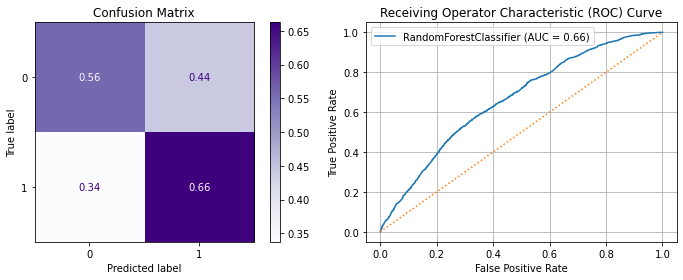

{'0': {'precision': 0.7751105495893872,
  'recall': 0.5584888484296768,
  'f1-score': 0.6492063492063492,
  'support': 4394},
 '1': {'precision': 0.4189877208745133,
  'recall': 0.6627190904784462,
  'f1-score': 0.513394495412844,
  'support': 2111},
 'accuracy': 0.5923136049192929,
 'macro avg': {'precision': 0.5970491352319502,
  'recall': 0.6106039694540615,
  'f1-score': 0.5813004223095966,
  'support': 6505},
 'weighted avg': {'precision': 0.6595417115544758,
  'recall': 0.5923136049192929,
  'f1-score': 0.6051327406962663,
  'support': 6505}}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomForestClassifier()
params ={'max_depth':[None,5,7,10,20,30],
         'criterion':['gini','entropy'],
         'class_weight':[None,"balanced"]# "balanced_subsample"]
        }
grid = RandomizedSearchCV(clf,params,scoring='roc_auc',n_iter=20, n_jobs=-1)

grid.fit(X_train_tf,y_train)
print(grid.best_params_)

evaluate_classification(grid.best_estimator_,X_test_tf,y_test)

['param_max_depth', 'param_criterion', 'param_class_weight', 'params']


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning:

FixedFormatter should only be used together with FixedLocator



<AxesSubplot:xlabel='param_max_depth'>

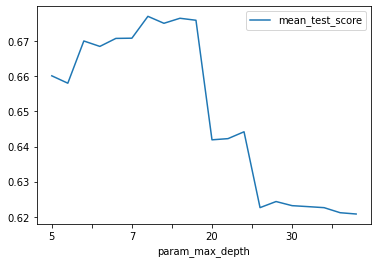

In [50]:
df_res = pd.DataFrame(grid.cv_results_)
print([col for col in df_res.columns if 'param' in col])
df_res.sort_values('param_max_depth').plot(x='param_max_depth',y='mean_test_score')

In [ ]:
# df_res.sort_values('mean_test_score',ascending=False)

# Using SHAP and Shapely Values for Model Interpretation




- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Blog Posts:
    - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

    - https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a


- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

## Using SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        

### To Get Expanations for Trees:



- Import and initialize javascript:

```python
import shap 
shap.initjs()
```
1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data

### Summary Plot

```python

## For normal bar graph of importance:
shap.summary_plot(shap_values,X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row

row = np.random.choice(range(len(X_train))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

In [52]:
!pip install -U shap

Requirement already up-to-date: shap in /opt/anaconda3/envs/learn-env/lib/python3.6/site-packages (0.36.0)


In [53]:
import shap
shap.__version__

'0.36.0'

In [54]:
# import shap
shap.initjs()

In [57]:
X_shap = shap.sample(X_test_tf,20)

In [58]:
explainer = shap.TreeExplainer(best_clf)
shap_values = explainer.shap_values(X_shap)

In [ ]:
# shap_values = shap.TreeExplainer(xgb_rf).shap_values(X_train)
# shap.summary_plot(shap_values, X_train, plot_type="bar")

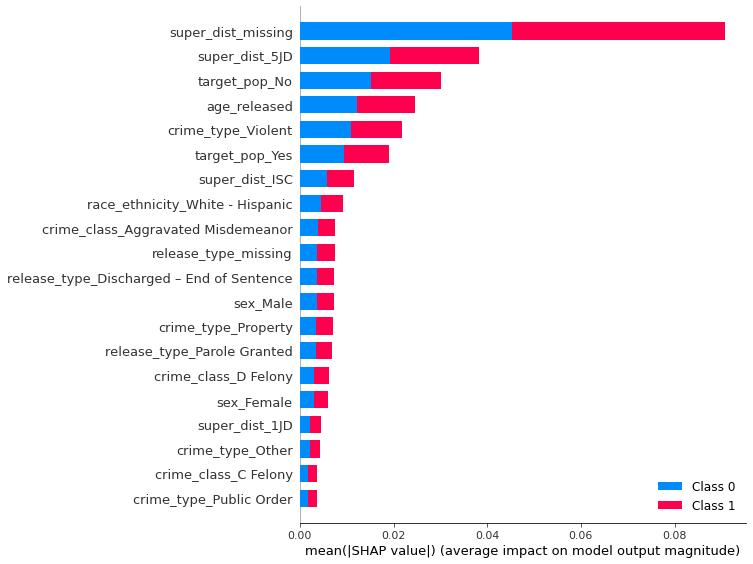

In [61]:
shap.summary_plot(shap_values, X_shap, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, X_tr_shap)#, plot_type="bar")

In [ ]:
shap.dependence_plot('age_released', shap_values, X_tr_shap)#"rank(1)"

In [ ]:
row = np.random.choice(range(len(X_tr_shap)))
display(X_tr_shap.iloc[row])                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_tr_shap.iloc[row])

## Support Vector Machines

In [ ]:
import os,glob,sys
folder ='py_files/'
sys.path.append(os.path.abspath(folder))
import mod_5_functions as m5

In [ ]:
# # X_train[top_cols]
# X_train.shape
# X_train = X_train[top_cols]
# X_test = X_test[top_cols]

In [ ]:
# np.logspace(0.01, 10,0.1)
np.logspace(-1,1,3)

In [ ]:
# from sklearn.pre

In [ ]:
from sklearn.svm import SVC,LinearSVC,NuSVC
clf = SVC()
clf.fit(X_train,y_train)
y_hat_test = clf.predict(X_test)
evaluate_model(y_test,y_hat_test,X_test,clf)

## SMOTE

In [ ]:
mask = []
for col in X_train_tf.columns:
    if col in cat_feautres:
        mask.append(True)
    else:
        mask.append(False)
# cat_mask = [True for col in X_train_tf.columns else False]
mask[:5]

In [ ]:
from imblearn.over_sampling import SMOTENC

smote = SMOTENC(categorical_features=mask)
X_train_res, y_train_res = smote.fit_resample(X_train_tf,y_train)

In [ ]:
y_train_res.value_counts(1)

In [ ]:
## Class_weight
## fit model
clf = RandomForestClassifier()
clf.fit(X_train_res,y_train_res)
evaluate_classification(clf,X_test_tf,y_test,classes=['No','Yes'],
                       label="class_weight='balanced'");

# SVMs Part 2
- 09/30 Study Group

## QUESTIONS TO RETURN TO

- Classification Report
- Plotting confusion matrix
- GridSearch, params, for SVM

## GridSearching for SVM with RBF Kernel best C and gamma

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
params = dict( C=[0.1,1,10],
             gamma = [0.1,1,100],
             class_weight =[None,'balanced'])

gridsearch= GridSearchCV(clf,params,cv=3, n_jobs=-1 )
gridsearch

In [ ]:
gridsearch.fit(X_train_tf,y_train)

In [ ]:
best_params = gridsearch.best_params_
best_params

In [ ]:
best_model = SVC(**best_params)

In [ ]:
best_model = gridsearch.best_estimator_
best_model

# APPENDIX

## Note re: predictions/probability

> You can make predictions using support vector machines. The SVC decision function gives a probability score per class. However, this is not done by default. You'll need to set the `probability` argument equal to `True`. Scikit-learn internally performs cross-validation to compute the probabilities, so you can expect that setting `probability` to `True` makes the calculations longer. For large datasets, computation can take considerable time to execute.

- In other words:
    - If you want to get the probabiltiies (`.predict_proba`) for ROC AUC, you would have to instantiate your SVC with the parameter `SVC(probability=True)`
    - https://www.kaggle.com/c/home-credit-default-risk/discussion/63499

## Scikit Learn Example of RBF Hyperparameters

> https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
#     plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
#               size='medium')
    plt.title(f"gamma={gamma}, C={C}")

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()